60.83389297658862

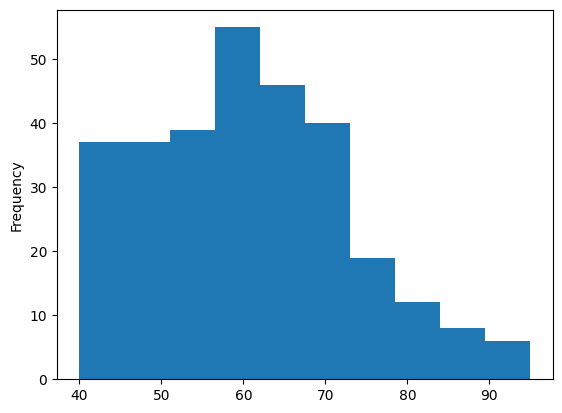

In [3]:
import pandas as pd
import numpy as np
import io
import matplotlib
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
import seaborn as sn
import ipywidgets as widgets
from IPython.display import display

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df["age"].plot(kind="hist")
df["age"].mean()

The above chart is a histogram showing the ages in years of the patients whose data is part of the training/test set. The average age of patients is 60.8 years old.

<Axes: ylabel='Frequency'>

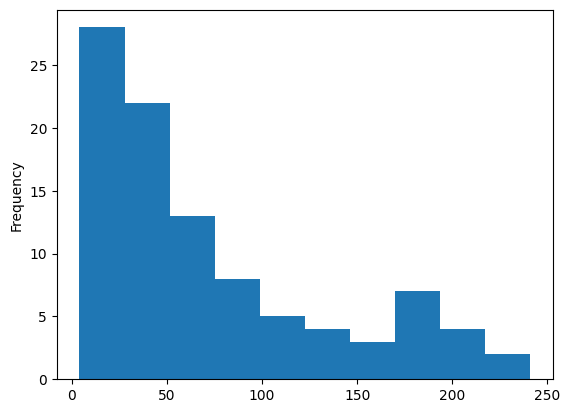

In [2]:
df.query("DEATH_EVENT==1")["time"].plot(kind="hist")

This chart shows the time until the next appointment for patients that died. Patients who were set to have followup appointments very soon where the most likely to die. There is no clinical connection between these factors - it simply represents that their doctors observed that these patients where at higher risk and needed greater monitoring. Therefore, the time data for each instance will not be used in the model.

In [3]:
df.drop(columns="time", inplace=True)
target = df.pop("DEATH_EVENT")
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3,random_state=109) # 70% training and 30% test

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(class_weight = {0:1, 1:2.5}))])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


The above code is the generation and testing of the model. A support vector machine (SVM) is used, as it was shown to be more accurate than several other models that were tried. The model tests at 76.6% accuracy.

<Axes: xlabel='Predicted', ylabel='Actual'>

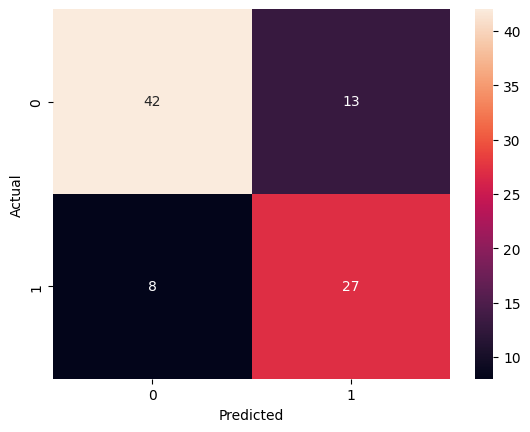

In [4]:
cmd = {'y_test': y_test, 'y_pred': y_pred}

cm = pd.DataFrame(cmd)

confusion_matrix = pd.crosstab(cm['y_test'], cm['y_pred'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

This is the confusion matrix from the testing data. The model of the 90 instances in the testing data, and the model accurately predicted 69 patient outcomes. There were 13 false positives and only 8 false negatives. This shows that, on the testing dataset, the model has a 7.2% false negative rate. This is excellent, given that false negatives are the clinical outcome that the model aims to avoid. 

In [10]:
dia = widgets.Checkbox(
    value=False,
    description='Diabetes',
    tooltip ="Diabetes",
    disabled=False,
    indent=False
)
ana = widgets.Checkbox(
    value=False,
    description='Anaemia',
    tooltip ="Anameia",
    disabled=False,
    indent=False
)

hbp = widgets.Checkbox(
    value=False,
    description='High Blood Pressure',
    tooltip ="High Blood Pressure",
    disabled=False,
    indent=False
)

smk = widgets.Checkbox(
    value=False,
    description='Smoker',
    tooltip ="Smoker",
    disabled=False,
    indent=False
)


age = widgets.BoundedIntText(
    value=50,
    min=0,
    max=150,
    step=1,
    description='Age:',
    tooltip ="Age",
    disabled=False
)

cp = widgets.BoundedIntText(
    value=50,
    min=0,
    max=500,
    step=1,
    description='Creatinine Phosphokinase:',
    tooltip ="Creatinine Phosphokinase",
    disabled=False
)

ef = widgets.BoundedIntText(
    value=30,
    min=0,
    max=150,
    step=1,
    description='Ejection Fraction:',
    tooltip ="Ejection Fraction",
    disabled=False
)

pla = widgets.BoundedFloatText(
    value=20000,
    min=0,
    max=100000,
    step=0.1,
    description='Platelets:',
    tooltip ="Platelets",
    disabled=False
)

sc = widgets.BoundedFloatText(
    value=1.9,
    min=0,
    max=4.0,
    step=0.1,
    description='Serum Creatinine:',
    tooltip ="Serum Creatinine",
    disabled=False
)

ss = widgets.BoundedIntText(
    value=150,
    min=0,
    max=250,
    step=1,
    description='Serum Sodium:',
    tooltip ="Serum Sodium",
    disabled=False
)

sex = widgets.Dropdown(
    options=['Female', 'Male'],
    value='Female',
    description='Sex:',
    tooltip="Sex",
    disabled=False,
)

go = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='', 
    tooltip='Click to predict mortality',
    icon=''
)

res = widgets.Output()

checks = [dia, ana, hbp, smk]

l_checks = widgets.VBox([checks[0], checks[1]])
r_checks = widgets.VBox([checks[2], checks[3]])
c_box = widgets.HBox([l_checks, r_checks])

nums = [age, cp, ef, pla, sc, ss, sex]

l_nums = widgets.VBox([nums[0], nums[1], go])
m_nums = widgets.VBox([nums[2], nums[3]])
r_nums = widgets.VBox([nums[4], nums[5], nums[6]])

n_box = widgets.HBox([l_nums, m_nums, r_nums])


display(c_box)
display(n_box)
display(res)

def on_button_clicked(b):
    if (sex == "Female"):
        sx =  0
    else:
        sx = 1
    tdf = pd.DataFrame(data = {"age":age.value, 
                               "anaemia":ana.value,
                               "creatinine_phosphokinase":cp.value,
                               "diabetes":dia.value,
                               "ejection_fraction":ef.value,
                               "high_blood_pressure":hbp.value,
                               "platelets":pla.value,
                               "serum_creatinine":sc.value,
                               "serum_sodium":ss.value,
                               "sex":sx,
                                "smoking":smk.value}, index=[0])
    r_pred = pipe.predict(tdf)
    res.clear_output(wait=True)
                               
    with res:
        if r_pred == 1:
            print("The model predicts that this patient will die before thier next appointment.")
        else:
            print("The model predicts that this patient will not die before their next appointment.")
        print("This model has not been evaluated by any medical or health authority, and is not to be used for real-world diagnosis or clinical evaluation!")

go.on_click(on_button_clicked)


Output()